In [6]:
using MAT
using LinearAlgebra
# vars = matread("/Users/user/Documents/Projects/python_util/test/data/LST_template.mat")
vars = matread("https://github.com/Userzj123/ERI/blob/172dafca1a8808f11a9dae390ca8d18e8975963b/notebooks/cases/LST/data/LST_template.mat")

ErrorException: File "https://github.com/Userzj123/ERI/blob/172dafca1a8808f11a9dae390ca8d18e8975963b/notebooks/cases/LST/data/LST_template.mat" does not exist and create was not specified

In [2]:
T = inv(vars["B"]) * vars["A"]
lambda = eigvals(T)
vecs = eigvecs(T)

1152×1152 Matrix{ComplexF64}:
         0.0-0.0im          …  0.0+0.0im     0.187905+0.145684im
         0.0-0.0im             0.0+0.0im     0.968975+0.0im
         0.0-0.0im             0.0+0.0im    0.0443659+0.0216235im
         0.0-0.0im             0.0+0.0im    0.0340034+0.00235871im
         0.0-0.0im             0.0+0.0im   0.00467092-0.0102688im
         0.0-0.0im          …  0.0+0.0im  -0.00386434+0.00251234im
         0.0-0.0im             0.0+0.0im   0.00332229-0.0106606im
         0.0-0.0im             0.0+0.0im  -0.00403616+0.00258741im
         0.0-0.0im             0.0+0.0im   0.00261275-0.0102746im
         0.0-0.0im             0.0+0.0im  -0.00365252+0.0026608im
            ⋮               ⋱     ⋮       
    0.125009-1.08419e-13im     0.0+0.0im          0.0+0.0im
 1.56018e-10-7.24993e-15im     0.0+0.0im          0.0+0.0im
    0.125255-7.21186e-14im  …  0.0+0.0im          0.0+0.0im
 1.56278e-10-7.26278e-15im     0.0+0.0im          0.0+0.0im
    0.125432-3.59549e-14im     

In [3]:
omega = 1im*lambda   # eigenvalues omega in vector form


sp = (abs.(omega) .> 1e-10) .* ( abs.(omega) .<50)

omega = omega[sp]
vecs = vecs[:, sp]

1152×169 Matrix{ComplexF64}:
 0.0+0.0im      0.599832+0.0im          …  0.0+0.0im
 0.0+0.0im    1.1719e-11+6.57165e-11im     0.0+0.0im
 0.0+0.0im     0.0458718+0.00464914im      0.0+0.0im
 0.0+0.0im  -1.18226e-12+6.89885e-12im     0.0+0.0im
 0.0+0.0im    -0.0952772+2.8778e-5im       0.0+0.0im
 0.0+0.0im  -5.10896e-12-5.32941e-12im  …  0.0+0.0im
 0.0+0.0im     -0.106483-0.000177117im     0.0+0.0im
 0.0+0.0im  -1.83906e-13-2.60942e-12im     0.0+0.0im
 0.0+0.0im     -0.116305-0.000208232im     0.0+0.0im
 0.0+0.0im  -1.37789e-13-4.24937e-14im     0.0+0.0im
    ⋮                                   ⋱  
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im          …  0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0

In [4]:
omega - vars["omega"]

169×1 Matrix{ComplexF64}:
    9.66986917515511e-5 - 0.008459556739303764im
  2.5794202831441737e-6 - 3.235067974015898im
 0.00012686839210962475 - 5.290018714934071im
    0.22983160629271232 - 47.59837787544295im
  1.2192241993780328e-8 - 9.697380676243483e-9im
 0.00013360754659985652 - 6.394383577306698im
  -8.901169265074227e-5 - 1.5909946321580648im
   9.045742989211014e-6 - 9.047252247206984im
   -0.07509763777097433 - 44.28913424350875im
 0.00020600740028120512 - 10.26115279207874im
                        ⋮
   0.056173074123281985 + 1.671272723398634im
    -0.1122777301241944 + 3.5161162744179184im
    0.06750174737085335 + 7.463714240941605im
    0.14673794777324567 + 4.750770675899103im
   0.026354414572417717 + 12.88847360509265im
     0.1796384422011773 + 10.936537717049536im
   -0.23533197547564438 + 9.249655270159382im
     0.2695572995663731 + 6.189232223925428im
    0.26833986813622035 + 24.97353025782965im

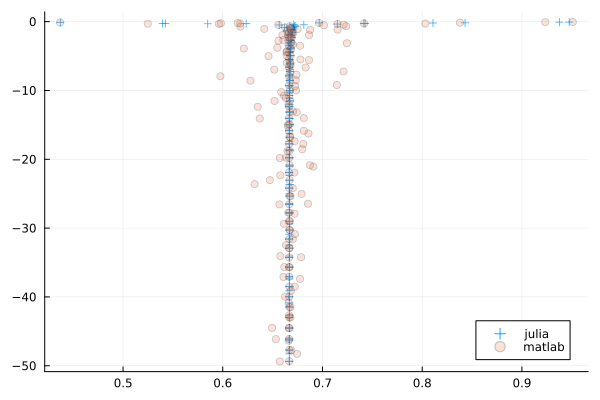

In [5]:
using Plots
scatter(real(omega), imag(omega), label="julia", markeralpha=0.8, marker=:cross)
scatter!(real(vars["omega"]), imag(vars["omega"]), label="matlab", markeralpha=0.2)